# Extraction, Cleaning, Processing, Analysis and Visualization

1. Import useful libraries
2. Load the dataset(s): read the data, display 'head', 'describe', 'info'
3. Clean: remove duplicates and inspect missing / anomalous values

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math, os

## Data extraction

In [64]:
df = pd.read_csv('data/FAO.csv', encoding='latin-1')
print(df.head())
print()
print(df.describe())
print()
print(df.info())

  Area Abbreviation  Area Code         Area  Item Code  \
0               AFG          2  Afghanistan       2511   
1               AFG          2  Afghanistan       2805   
2               AFG          2  Afghanistan       2513   
3               AFG          2  Afghanistan       2513   
4               AFG          2  Afghanistan       2514   

                       Item  Element Code Element         Unit  latitude  \
0        Wheat and products          5142    Food  1000 tonnes     33.94   
1  Rice (Milled Equivalent)          5142    Food  1000 tonnes     33.94   
2       Barley and products          5521    Feed  1000 tonnes     33.94   
3       Barley and products          5142    Food  1000 tonnes     33.94   
4        Maize and products          5521    Feed  1000 tonnes     33.94   

   longitude  ...   Y2004   Y2005   Y2006   Y2007   Y2008   Y2009   Y2010  \
0      67.71  ...  3249.0  3486.0  3704.0  4164.0  4252.0  4538.0  4605.0   
1      67.71  ...   419.0   445.0   546.

## Cleaning

In [65]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check for missing values
print('\nMissing values per column:')
print(df.isnull().sum())

# Drop rows that contain any missing values
df = df.dropna()
# Check whether rows were removed
print('\nAfter cleaning:')
print(df.info())


Missing values per column:
Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
Y2009                104
Y2010                104
Y2011                104
Y2012                  0
Y2013                  0
Length: 63, dtype: int64

After cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 17938 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  17938 non-null  object 
 1   Area Code          17938 non-null  int64  
 2   Area               17938 non-null  object 
 3   Item Code          17938 non-null  int64  
 4   Item               17938 non-null  object 
 5   Element Code       17938 non-null  int64  
 6   Element            17938 non-null  object 
 7   Unit               17938 non-null  object 
 8   latitude           17938 non-null  float64
 9   longitude         

### Column processing (convert Unit to integer, rename year columns to date, group/export to .csv)

In [66]:
# UNIT: convert to integer
# Step 1: show unique values of the Unit column
print(df["Unit"].unique())
# Step 2: remove the word "tonnes" (and any surrounding spaces)
df["Unit"] = df["Unit"].str.replace("tonnes", "", case=False).str.strip()
# Step 3: convert the column to integer (Int64 nullable dtype)
df["Unit"] = pd.to_numeric(df["Unit"], errors="coerce").astype("Int64")
# Step 4 (optional): verify the result
print(df["Unit"].head())
print(df["Unit"].dtypes)

['1000 tonnes']
0    1000
1    1000
2    1000
3    1000
4    1000
Name: Unit, dtype: Int64
Int64


In [67]:
# YEARS: rename year columns to their numeric year strings
# Step 1: identify columns that start with 'Y'
year_columns = [col for col in df.columns if col.startswith('Y')]

# Step 2: build a mapping to rename 'Y1961' -> '1961', etc.
year_dict = {col: pd.to_datetime(col[1:]).strftime('%Y') for col in year_columns}

# Step 3: rename the columns
df = df.rename(columns=year_dict)

# Step 4: print result for verification
print("New year columns:")
print([col for col in df.columns if col.isdigit()])

New year columns:
['1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']

['1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [68]:
# Save the cleaned table to data/clean
os.makedirs('data/clean', exist_ok=True)

# Copy the current DataFrame (after cleaning/transformations)
df_clean = df.copy()

# Output path
path_wide = 'data/clean/fao_clean.csv'

# Save files
try:
    df_clean.to_csv(path_wide, index=False)
    print(f"Saved: {path_wide} (shape={df_clean.shape})")
    print("initial shape=", df.shape)
except Exception as e:
    print('Error during save:', e)

Saved: data/clean/fao_clean.csv (shape=(17938, 63))
initial shape= (17938, 63)


Dataset shape (wide): (17938, 63)
Dataset shape (long): (950714, 12)

Value column - descriptive statistics:
count    950714.000000
mean        379.120860
std        3951.179033
min        -246.000000
25%           0.000000
50%           3.000000
75%          49.000000
max      489299.000000
Name: Value, dtype: float64

Unique counts (Area / Item / Element / Unit):
Area       146
Item       115
Element      2
Unit         1
dtype: int64

Top 10 Areas by total Value:
Area
China, mainland             76248859.0
United States of America    41719176.0
India                       36549150.0
Brazil                      13818239.0
Germany                     12300442.0
Japan                        9840441.0
France                       8789026.0
Italy                        7734322.0
Nigeria                      7354579.0
Indonesia                    7298902.0
Name: Value, dtype: float64


C:\Users\axela\AppData\Local\Temp\ipykernel_448\1687397616.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')


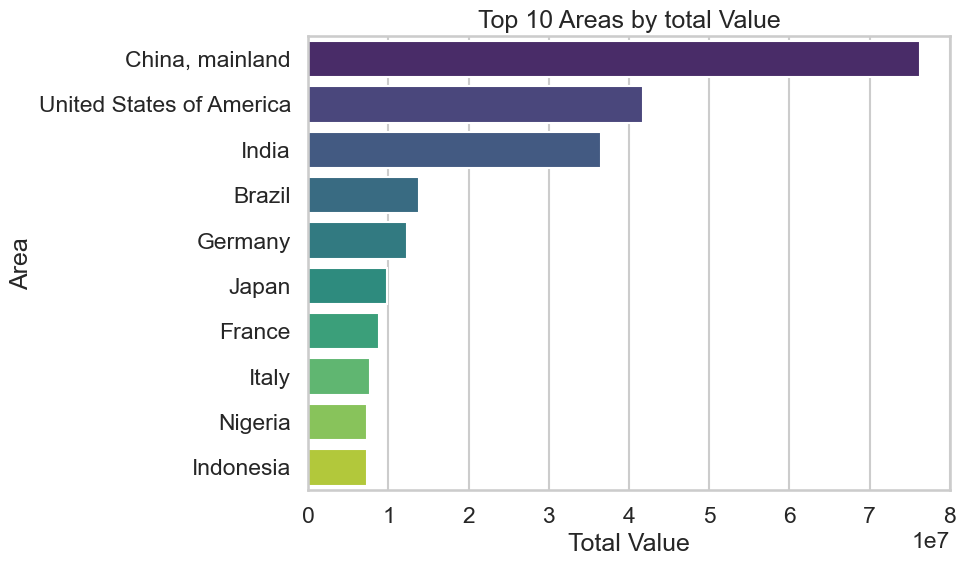

C:\Users\axela\AppData\Local\Temp\ipykernel_448\1687397616.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='magma')


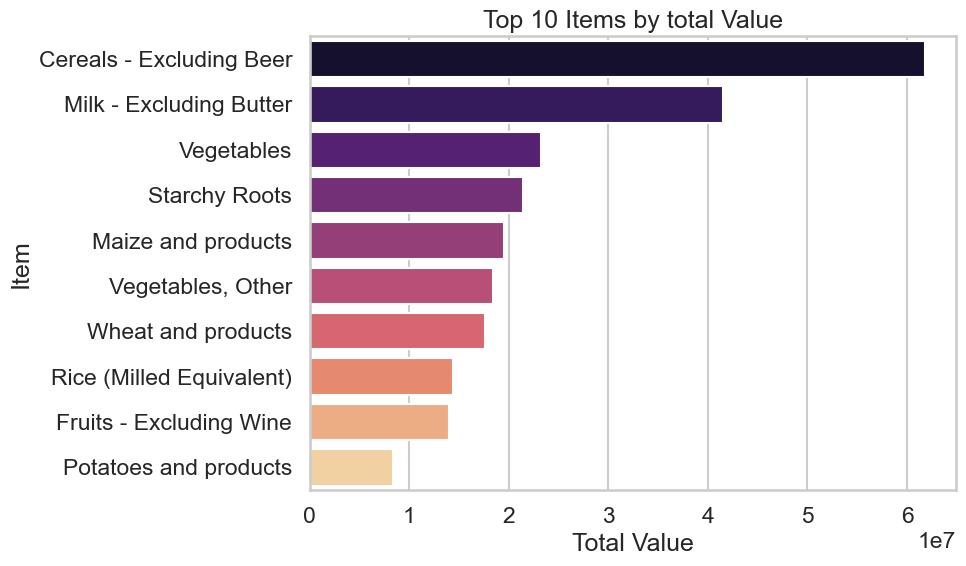

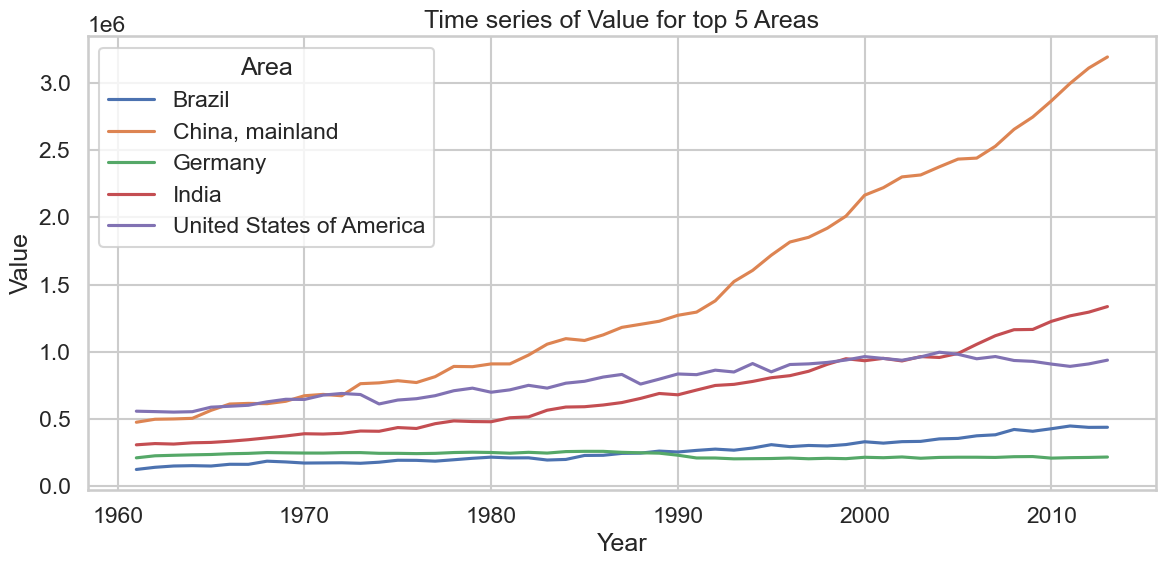


Missing values per year (sample):
Year
1961    0
1962    0
1963    0
1964    0
1965    0
1966    0
1967    0
1968    0
1969    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
Name: Value, dtype: int64


In [ ]:
# Exploratory EDA: descriptive statistics and plots
sns.set(style='whitegrid', context='talk')

# Identify year columns (after renaming)
year_cols = [c for c in df.columns if c.isdigit()]
# convert to numeric if necessary
if year_cols:
    df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

# Melt to long format for time series analysis
id_vars = [c for c in df.columns if c not in year_cols]
df_long = df.melt(id_vars=id_vars, value_vars=year_cols, var_name='Year', value_name='Value')
df_long['Year'] = pd.to_datetime(df_long['Year'], format='%Y', errors='coerce')

# Overview and stats
print("Dataset shape (wide):", df.shape)
print("Dataset shape (long):", df_long.shape)
print("\nValue column - descriptive statistics:")
print(df_long['Value'].describe())

print("\nUnique counts (Area / Item / Element / Unit):")
print(df[['Area','Item','Element','Unit']].nunique())

# Top 10 Areas by total Value
top_areas = df_long.groupby('Area')['Value'].sum().sort_values(ascending=False).head(10)
print("\nBot 10 Areas by total Value:")
print(Bot_areas)

# Plot 1: barplot Bot 10 Areas
plt.figure(figsize=(10,6))
sns.barplot(x=Bot_areas.values, y=Bot_areas.index, palette='viridis')
plt.title('Bot 10 Areas by total Value')
plt.xlabel('Total Value')
plt.tight_layout()
plt.show()

# Plot 2: top 10 Items by total Value
top_items = df_long.groupby('Item')['Value'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_items.values, y=top_items.index, palette='magma')
plt.title('Top 10 Items by total Value')
plt.xlabel('Total Value')
plt.tight_layout()
plt.show()

# Plot 3: time series for the top 5 Areas
top5 = list(top_areas.index[:5])
ts = df_long[df_long['Area'].isin(top5)].groupby(['Year','Area'])['Value'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=ts, x='Year', y='Value', hue='Area')
plt.title('Time series of Value for top 5 Areas')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Missingness by year (useful to decide imputation or deletion)
missing_per_year = df_long.groupby(df_long['Year'].dt.year)['Value'].apply(lambda x: x.isna().sum())
print("\nMissing values per year (sample):")
print(missing_per_year.head(15))

Top 6 Areas by total production:
Area
China, mainland             76248859.0
United States of America    41719176.0
India                       36549150.0
Brazil                      13818239.0
Germany                     12300442.0
Japan                        9840441.0
Name: Value, dtype: float64


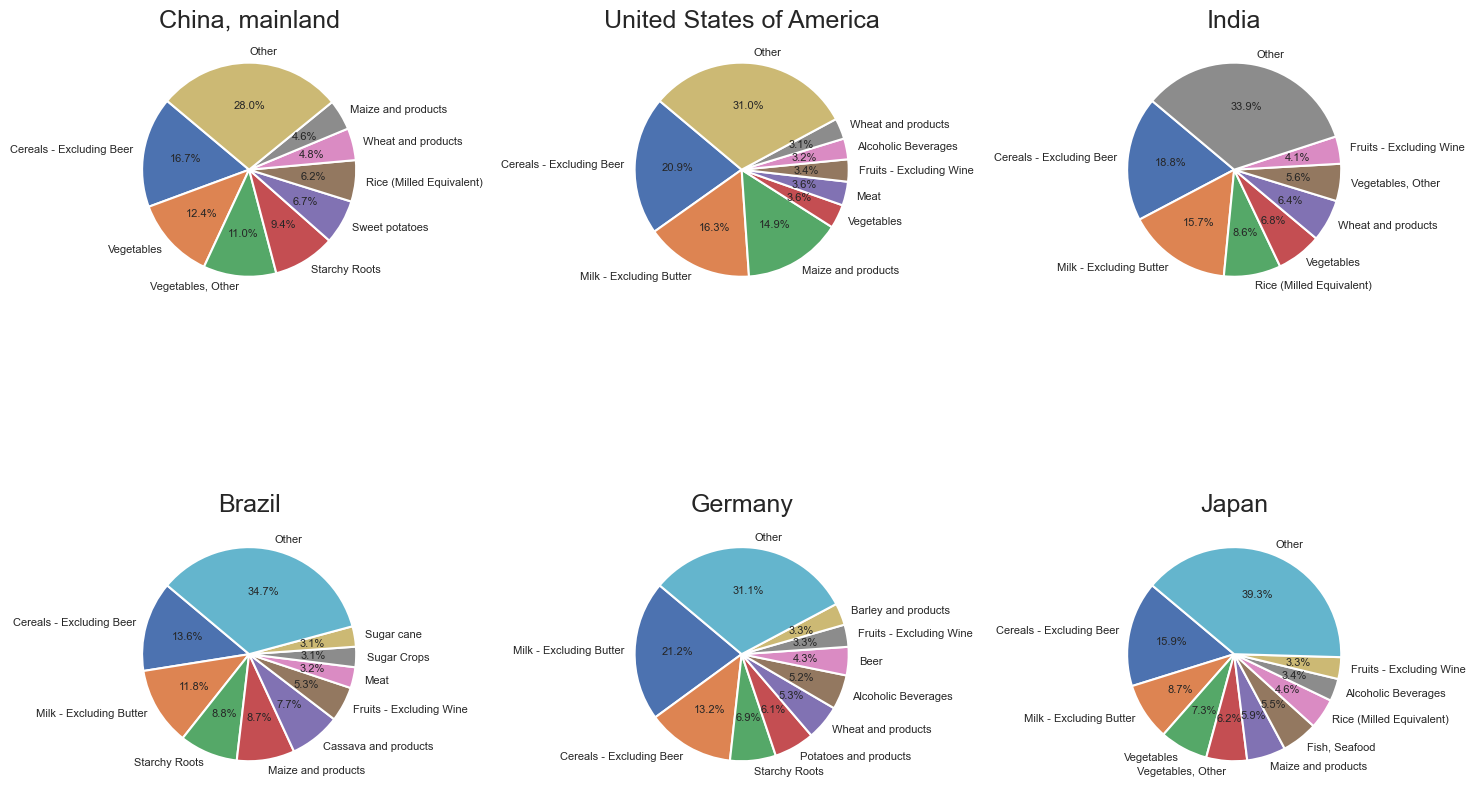

In [70]:
# Pie charts per country: distribution of production by Item (aggregated over all years)

# Aggregate by Area + Item (sum over years)
agg = df_long.groupby(['Area','Item'])['Value'].sum().reset_index()
# Totals by Area to select which countries to plot
total_by_area = agg.groupby('Area')['Value'].sum().sort_values(ascending=False)
print('Top 6 Areas by total production:')
print(total_by_area.head(6))

# Default selection: top 6 areas. Change top_n if you want more/less.
top_n = 6
selected_areas = list(total_by_area.head(top_n).index)

# Utility function: plot a pie chart for an Area
def plot_pie_for_area(area, ax=None, small_pct_threshold=0.03):
    data = agg[agg['Area'] == area].copy()
    data = data.sort_values('Value', ascending=False)
    data = data[data['Value'] > 0]
    if data.empty:
        if ax is None:
            fig, ax = plt.subplots()
        ax.text(0.5, 0.5, 'No data', ha='center')
        ax.set_title(area)
        return
    total = data['Value'].sum()
    # Group small slices into 'Other' (relative threshold)
    thresh = total * small_pct_threshold
    big = data[data['Value'] >= thresh]
    small = data[data['Value'] < thresh]
    labels = list(big['Item'])
    sizes = list(big['Value'])
    if not small.empty:
        labels.append('Other')
        sizes.append(small['Value'].sum())
    # Plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,6))
    ax.pie(sizes, labels=labels, autopct=lambda p: ('%1.1f%%' % p) if p>0 else '', startangle=140, textprops={'fontsize':8})
    ax.set_title(area)

# Plot multiple pies in a grid
n = len(selected_areas)
cols = 3
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
axes = axes.flatten()
for i, area in enumerate(selected_areas):
    plot_pie_for_area(area, ax=axes[i])
# Turn off remaining axes
for j in range(i+1, rows*cols):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

### Graphiques sur les "moins" niveau pays et items produits

Dataset shape (wide): (17938, 63)
Dataset shape (long): (950714, 12)

Value column - descriptive statistics:
count    950714.000000
mean        379.120860
std        3951.179033
min        -246.000000
25%           0.000000
50%           3.000000
75%          49.000000
max      489299.000000
Name: Value, dtype: float64

Unique counts (Area / Item / Element / Unit):
Area       146
Item       115
Element      2
Unit         1
dtype: int64

Bot 10 Areas by total Value:
Area
Saint Kitts and Nevis                2102.0
Kiribati                             4406.0
Antigua and Barbuda                  4446.0
Bermuda                              4933.0
Grenada                              6379.0
Saint Vincent and the Grenadines     6715.0
Dominica                             7372.0
Sao Tome and Principe                7382.0
Saint Lucia                         10141.0
Vanuatu                             11362.0
Name: Value, dtype: float64


C:\Users\axela\AppData\Local\Temp\ipykernel_448\880661218.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')


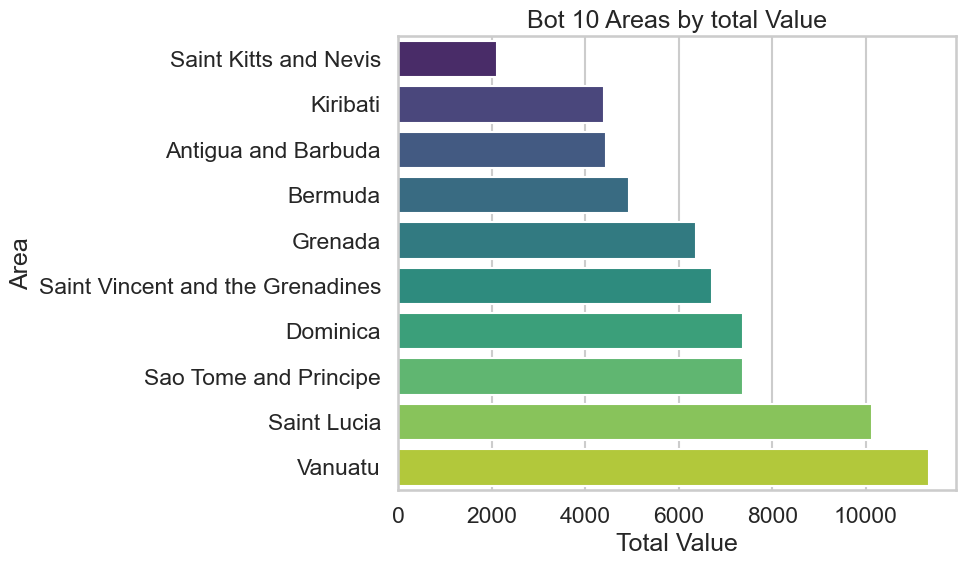

C:\Users\axela\AppData\Local\Temp\ipykernel_448\880661218.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='magma')


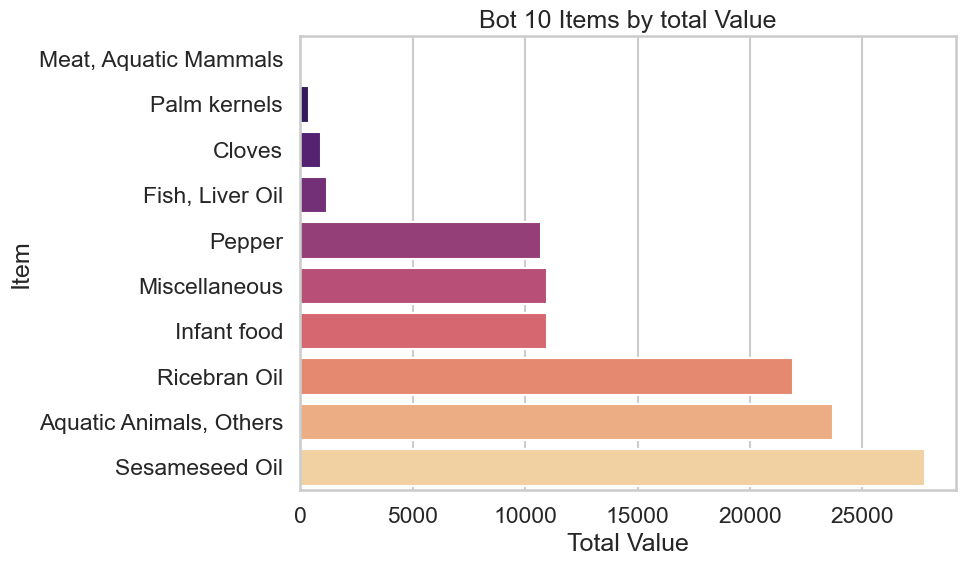

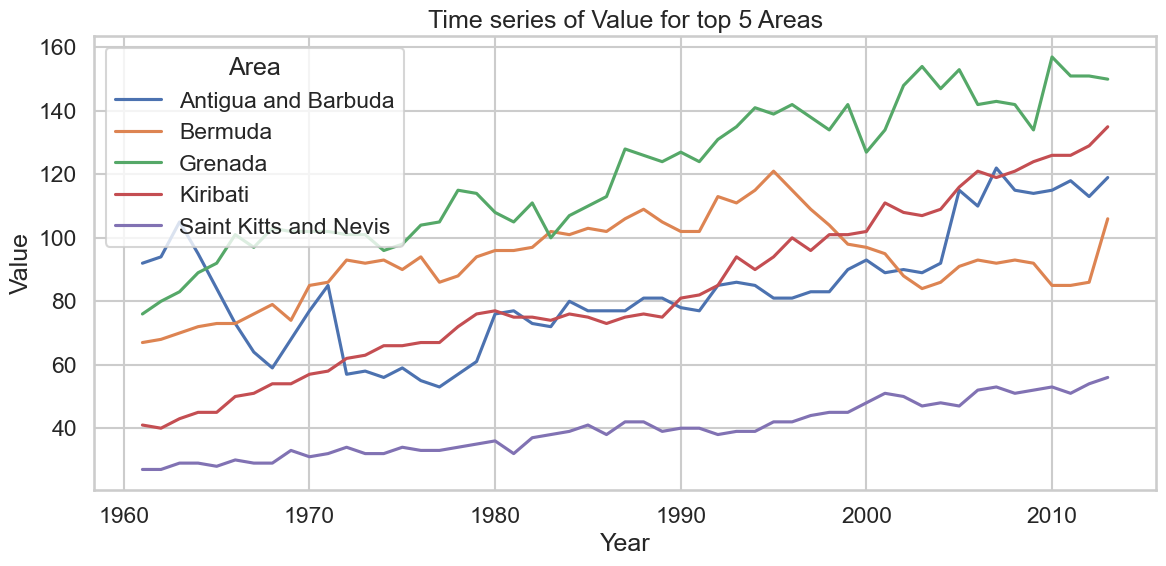


Missing values per year (sample):
Year
1961    0
1962    0
1963    0
1964    0
1965    0
1966    0
1967    0
1968    0
1969    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
Name: Value, dtype: int64


In [74]:
# Exploratory EDA: descriptive statistics and plots
sns.set(style='whitegrid', context='talk')

# Identify year columns (after renaming)
year_cols = [c for c in df.columns if c.isdigit()]
# convert to numeric if necessary
if year_cols:
    df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

# Melt to long format for time series analysis
id_vars = [c for c in df.columns if c not in year_cols]
df_long = df.melt(id_vars=id_vars, value_vars=year_cols, var_name='Year', value_name='Value')
df_long['Year'] = pd.to_datetime(df_long['Year'], format='%Y', errors='coerce')

# Overview and stats
print("Dataset shape (wide):", df.shape)
print("Dataset shape (long):", df_long.shape)
print("\nValue column - descriptive statistics:")
print(df_long['Value'].describe())

print("\nUnique counts (Area / Item / Element / Unit):")
print(df[['Area','Item','Element','Unit']].nunique())

# Bot 10 Areas by total Value
top_areas = df_long.groupby('Area')['Value'].sum().sort_values(ascending=True).head(10)
print("\nBot 10 Areas by total Value:")
print(top_areas)

# Plot 1: barplot top 10 Areas
plt.figure(figsize=(10,6))
sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')
plt.title('Bot 10 Areas by total Value')
plt.xlabel('Total Value')
plt.tight_layout()
plt.show()

# Plot 2: top 10 Items by total Value
top_items = df_long.groupby('Item')['Value'].sum().sort_values(ascending=True).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_items.values, y=top_items.index, palette='magma')
plt.title('Bot 10 Items by total Value')
plt.xlabel('Total Value')
plt.tight_layout()
plt.show()

# Plot 3: time series for the top 5 Areas
top5 = list(top_areas.index[:5])
ts = df_long[df_long['Area'].isin(top5)].groupby(['Year','Area'])['Value'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=ts, x='Year', y='Value', hue='Area')
plt.title('Time series of Value for top 5 Areas')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Missingness by year (useful to decide imputation or deletion)
missing_per_year = df_long.groupby(df_long['Year'].dt.year)['Value'].apply(lambda x: x.isna().sum())
print("\nMissing values per year (sample):")
print(missing_per_year.head(15))

Bot 6 Areas by total production:
Area
Saint Kitts and Nevis               2102.0
Kiribati                            4406.0
Antigua and Barbuda                 4446.0
Bermuda                             4933.0
Grenada                             6379.0
Saint Vincent and the Grenadines    6715.0
Name: Value, dtype: float64


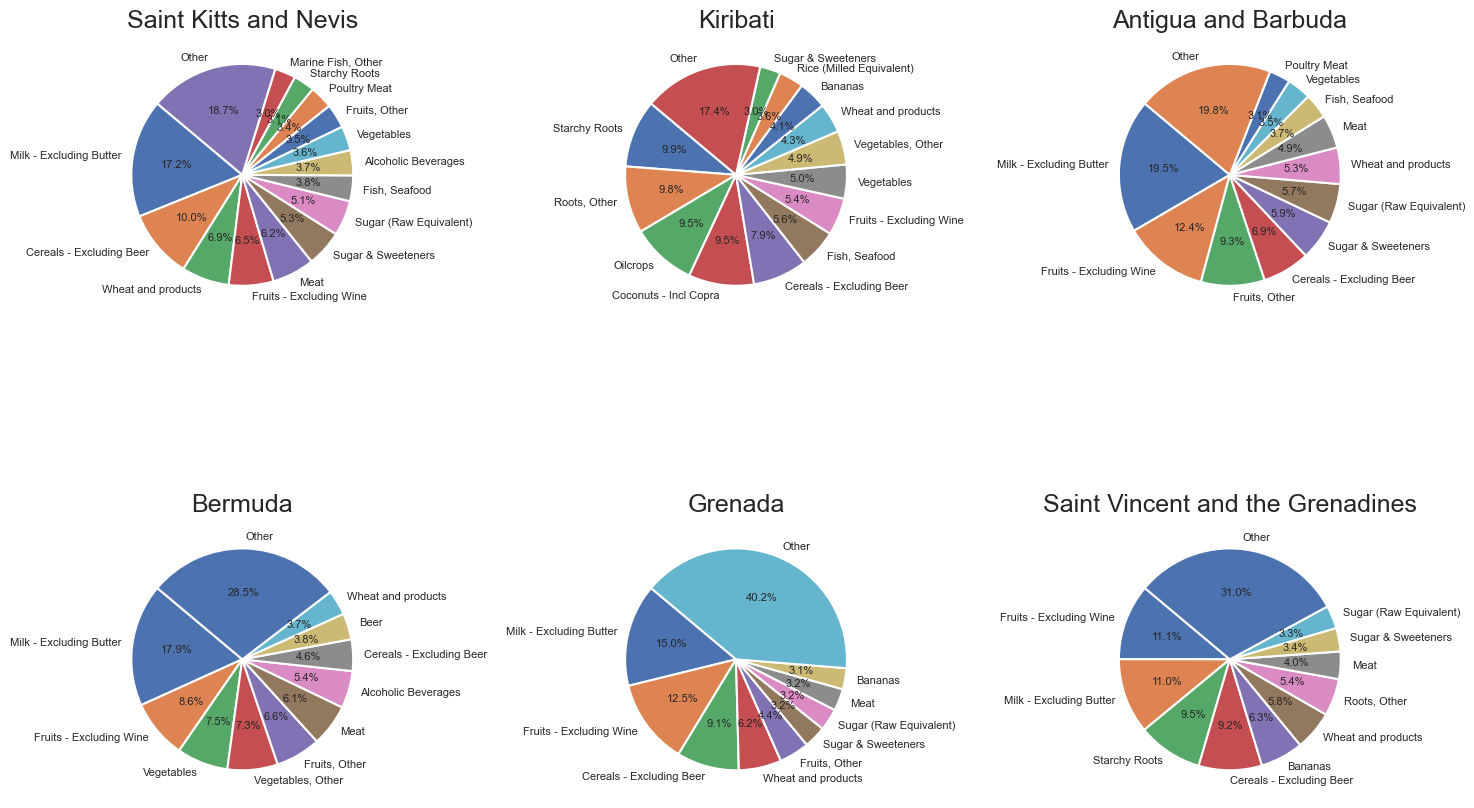

In [73]:
# Pie charts per country: distribution of production by Item (aggregated over all years)

# Aggregate by Area + Item (sum over years)
agg = df_long.groupby(['Area','Item'])['Value'].sum().reset_index()
# Totals by Area to select which countries to plot
total_by_area = agg.groupby('Area')['Value'].sum().sort_values(ascending=True)
print('Bot 6 Areas by total production:')
print(total_by_area.head(6))

# Default selection: top 6 areas. Change top_n if you want more/less.
top_n = 6
selected_areas = list(total_by_area.head(top_n).index)

# Utility function: plot a pie chart for an Area
def plot_pie_for_area(area, ax=None, small_pct_threshold=0.03):
    data = agg[agg['Area'] == area].copy()
    data = data.sort_values('Value', ascending=False)
    data = data[data['Value'] > 0]
    if data.empty:
        if ax is None:
            fig, ax = plt.subplots()
        ax.text(0.5, 0.5, 'No data', ha='center')
        ax.set_title(area)
        return
    total = data['Value'].sum()
    # Group small slices into 'Other' (relative threshold)
    thresh = total * small_pct_threshold
    big = data[data['Value'] >= thresh]
    small = data[data['Value'] < thresh]
    labels = list(big['Item'])
    sizes = list(big['Value'])
    if not small.empty:
        labels.append('Other')
        sizes.append(small['Value'].sum())
    # Plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,6))
    ax.pie(sizes, labels=labels, autopct=lambda p: ('%1.1f%%' % p) if p>0 else '', startangle=140, textprops={'fontsize':8})
    ax.set_title(area)

# Plot multiple pies in a grid
n = len(selected_areas)
cols = 3
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
axes = axes.flatten()
for i, area in enumerate(selected_areas):
    plot_pie_for_area(area, ax=axes[i])
# Turn off remaining axes
for j in range(i+1, rows*cols):
    axes[j].axis('off')
plt.tight_layout()
plt.show()